In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from energy_spectrum import compute_scalar_energy_spectrum, compute_energy_spectrum, compute_scalar_energy_spectrum_numba # type: ignore

### 1D

In [ ]:
N = 20
ek_u = [1] * N
ek_u = np.array(ek_u[::-1] + [0] + ek_u)
plt.stem(ek_u)

k, ek = compute_scalar_energy_spectrum(
    ek_u=ek_u, debug=False
)
plt.figure()
plt.stem(ek)
plt.plot(ek_u[(len(ek_u)-1)//2:], 'k')

In [ ]:
N = 10
ek_u = list(np.arange(N)+1)
ek_u = ek_u[::-1] + [0] + ek_u
ek_u = np.array(ek_u)
print(len(ek_u))
plt.stem(ek_u)

k, ek = compute_scalar_energy_spectrum(ek_u)
plt.figure()
plt.stem(ek)
plt.plot(ek_u[(len(ek_u)-1)//2:], 'k')

### 2D

In [ ]:
sr = 30
x = y = np.arange(0, 1., 1. / sr)
X, Y = np.meshgrid(x, y)
u = np.sin(2 * np.pi * X) + np.sin(2 * np.pi * 2 * Y)
U0 = 1.

# When
ek_u, ek_v, ek_w, u_spectrum, v_spectrum, w_spectrum =\
    compute_energy_spectrum(
        u=u, v=u, w=None, U0=U0, debug=True
    )
plt.imshow(ek_u)
plt.colorbar()
plt.axis('equal')

In [ ]:
tol = 1e-12
ind = np.where(np.abs(u_spectrum - 0.5) < tol)
ind, np.max(u_spectrum)

In [ ]:
k, ek = compute_scalar_energy_spectrum(ek_u, ek_v)
plt.stem(ek)
plt.grid()

In [ ]:
def mirror_data(q1):
    q2 = np.fliplr(q1)
    q3 = np.flipud(q1)
    q4 = np.flipud(q2)
    Q = np.vstack((np.hstack((q1, q2)), np.hstack((q3, q4))))
    return Q

In [ ]:
# Create data for first quadrant
ek_u = np.array([
    [1, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
plt.imshow(ek_u)
plt.colorbar()
plt.axis('equal')

In [ ]:
k, ek, ek_u_sphere, ek_v_sphere, ek_w_sphere =\
    compute_scalar_energy_spectrum(ek_u, ek_u, debug=True)
print(len(k))

In [ ]:
plt.plot(k, ek)
plt.stem(ek_u_sphere)

In [ ]:
# Create meshgrid of 10X10 points
x = y = np.arange(-1, 1., 1. / 50)
X, Y = np.meshgrid(x, y)

# Create a circle
r = 0.5
u = np.sqrt((X)**2 + (Y )**2) < r
plt.imshow(u)

In [ ]:
k, ek, ek_u_sphere, ek_v_sphere, ek_w_sphere =\
    compute_scalar_energy_spectrum(u, u, debug=True)

In [ ]:
plt.plot(k, ek)
plt.stem(ek_u_sphere)

### 3D

In [ ]:
sr = 30
x = y = z = np.arange(0, 1., 1. / sr)
X, Y, Z = np.meshgrid(x, y, z)
u = np.sin(2 * np.pi * X) + np.sin(2 * np.pi * 2 * Y) +\
    np.sin(2 * np.pi * 3 * Z)
U0 = 0.5
ek_u, ek_v, ek_w, u_spectrum, v_spectrum, w_spectrum =\
    compute_energy_spectrum(
        u=u, v=u, w=u, U0=U0, debug=True
    )

In [ ]:
tol = 1e-10
ind = np.where(np.abs(u_spectrum - 1.) < tol)
ind, np.max(ek_u)

In [ ]:
ek_u = np.array([
    [
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]
    ],
    [
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ],
    [
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]
    ]
])
k, ek, ek_u_sphere, ek_v_sphere, ek_w_sphere =\
    compute_scalar_energy_spectrum(ek_u, ek_u, ek_u, debug=True)
print(len(k))

In [ ]:
plt.plot(ek_u_sphere)
plt.stem(ek_u_sphere)
plt.grid()
np.round(ek_u_sphere)

### Scipy vs Numpy FFTm

In [ ]:
from numpy.fft import fftn as fftn_numpy
from scipy.fft import fftn as fftn_scipy
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
# Sampling rate
sr = 5000

# Time vector
t = np.arange(0, 1., 1. / sr)

# Signal
f = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
a = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
x = np.zeros(len(t))
for i in range(len(f)):
    x += a[i] * np.sin(2 * np.pi * f[i] * t)

# FFT - Numpy
X_numpy = fftn_numpy(x)
X_numpy = np.abs(X_numpy)

# FFT - Scipy
X_scipy = fftn_scipy(x)
X_scipy = np.abs(X_scipy)

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.subplot(131)
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal')
plt.subplot(132)
plt.loglog(X_numpy, 'r', label='Numpy')
plt.loglog(X_scipy, 'b', label='Scipy')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT')
plt.legend()
plt.subplot(133)
# Plot error
plt.loglog(np.abs(X_numpy - X_scipy), 'k')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Error')

plt.tight_layout()
plt.axis('equal')

In [ ]:
# Plot Computation Time of numpy and scipy fftn
N_run = 10
t_numpy = []
t_scipy = []
N_array = np.arange(10, 15) #np.arange(10, 25)
N_array = 2**N_array
for n, N in enumerate(N_array):
    if n % 5 == 0:
        print(n)
    x0 = np.random.rand(N)
    t0 = time.time()
    for i in range(N_run):
        X_numpy = fftn_numpy(x0)
    t1 = time.time()
    t_numpy.append((t1 - t0) / 10)

    t0 = time.time()
    for i in range(N_run):
        X_scipy = fftn_scipy(x0, workers=64)
    t1 = time.time()
    t_scipy.append((t1 - t0) / 10)

In [ ]:
# Plot log-log plots
fig, ax = plt.subplots()
ax.semilogx(N_array, t_scipy, 'bo--', label='Scipy')
ax.semilogx(N_array, t_numpy, 'ro--', label='Numpy')
ax.set_xlabel('N')
ax.set_ylabel('Time (s)')
ax.set_title('Computation Time')
ax.legend()
plt.tight_layout()

# Plot speedup in secondary y-axis
speedup = np.array(t_scipy) / np.array(t_numpy)
speedup = np.abs(speedup)
ax2 = ax.twinx()
ax2.plot(N_array, speedup, 'k')
ax2.set_ylabel('Speedup (Scipy / Numpy)')
ax2.hlines(1, N_array[0], N_array[-1], 'k', '--')
plt.tight_layout()

In [ ]:
# %timeit fftn_scipy(x, workers=None)

In [ ]:
# %timeit fftn_scipy(x, workers=-1)

In [ ]:
# %timeit fftn_scipy(x, workers=1)

In [ ]:
# %timeit fftn_scipy(x, workers=64)

### Benchmark Problem

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from energy_spectrum import compute_energy_spectrum, compute_scalar_energy_spectrum # type: ignore

In [ ]:
# Create meshgrid
N = 50
x = y = np.arange(0, 1., 1. / N)
X, Y = np.meshgrid(x, y)

# Sine wave
twopi = 2 * np.pi
u = - np.cos(twopi * X) * np.sin(twopi * Y)
v = np.sin(twopi * X) * np.cos(twopi * Y)

ek_u, ek_v, ek_w = compute_energy_spectrum(u, v, debug=False)
k, ek, = compute_scalar_energy_spectrum(ek_u, ek_v, ek_w=None, debug=False)

In [ ]:
plt.subplot(121)
plt.imshow(u)
plt.title('u')
plt.subplot(122)
plt.imshow(v)
plt.title('v')

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(ek_u)
plt.colorbar()
plt.title('ek_u')
plt.subplot(122)
plt.plot(k, ek, 'k')
plt.stem(k, ek)
plt.grid()
plt.title('ek')

In [ ]:
def test(perturb=False):
    if not perturb:
        data = np.load('outputs\\tgv_re_100_nx_50_uniform\\energy_spectrum.npz')
    else:
        data = np.load('outputs\\tgv_re_100_nx_50\\energy_spectrum.npz')

    # Kernel radius
    h = data['h']
    k_h = 1. / h

    # Create meshgrid
    N = data["Ni"]
    x = y = np.arange(0, 1., 1. / N)
    X, Y = np.meshgrid(x, y)

    # Initial Sine wave
    twopi = 2 * np.pi
    u = - np.cos(twopi * X) * np.sin(twopi * Y)
    v = np.sin(twopi * X) * np.cos(twopi * Y)
    ek_u, ek_v, ek_w = compute_energy_spectrum(u, v, debug=False)
    k, ek, = compute_scalar_energy_spectrum(ek_u, ek_v, ek_w=None, debug=False)

    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.loglog(k, ek, 'k-', label='expected')
    plt.loglog(data['k0'], data['ek0'], 'b-', label='TGV0')
    plt.vlines(k_h, 1e-46, 1e-1, 'g', '--', label='h')
    plt.legend()
    plt.xlabel('k')
    plt.ylabel('ek')
    plt.title(f'N = {N}, Perturb = {perturb}')
    plt.grid()

    # Final Sine wave
    b = -2.*twopi/100.
    fac = np.exp(b*data["tf"])
    u = - np.cos(twopi * X) * np.sin(twopi * Y) * fac
    v = np.sin(twopi * X) * np.cos(twopi * Y) * fac
    ek_u, ek_v, ek_w = compute_energy_spectrum(u, v, debug=False)
    k, ek, = compute_scalar_energy_spectrum(ek_u, ek_v, ek_w=None, debug=False)

    plt.subplot(122)
    plt.loglog(k, ek, 'k-', label='expected')
    plt.loglog(data['kf'], data['ekf'], 'b-', label='TGVf')
    plt.vlines(k_h, 1e-46, 1e-1, 'g', '--', label='h')
    plt.legend()
    plt.xlabel('k')
    plt.ylabel('ek')
    plt.title(f'N = {N}, Perturb = {perturb}')
    plt.grid()

In [ ]:
# test(perturb=True)

### Test OOP Implementation

In [ ]:
from energy_spectrum import EnergySpectrum # type: ignore
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# eval_u = "sin(twopi*x) + sin(twopi*x)"
eval_u = "sin(twopi*x) + sin(2*twopi*y)"
eval_v = "sin(2*twopi*x) + cos(3*twopi*y)"
cf = [eval_u, eval_v]
# cf = None
dim = 2
nx = 7
es = EnergySpectrum.from_example(dim=dim, nx=nx, custom_formula=cf)
# es.plot_scalar_ek(show=1, plot_type="stem")
es.plot_vector_ek(show=1, shift_fft=0)

In [ ]:
es.plot_scalar_ek(show=1, plot_type="stem")
# es.plot_EK(show=1, shift_fft=0)


In [ ]:
# fname = "sin_velocity_profile_output/sin_velocity_profile_00000.hdf5"
# esfile = EnergySpectrum.from_pysph_file(fname=fname, dim=2, L=1, nx_i=50)

In [ ]:
# esfile.plot_scalar_ek(show=1, plot_type="stem")

## Numba/Compyle Implementation Speedup Comparison

In [ ]:
import timeit
from energy_spectrum import EnergySpectrum # type: ignore
import matplotlib.pyplot as plt
import numpy as np

### 1D

In [ ]:
es_ob = EnergySpectrum.from_example(dim=1, nx=50, custom_formula=None)

In [ ]:
%timeit es_ob.compute(func_config='python')

In [ ]:
%timeit es_ob.compute(func_config='numba')

### Speedup

In [ ]:
def plot_speedup():
    plt.figure()
    EPS = 1e-50
    for dim in [1, 2, 3]:
        print(f"dim = {dim}")
        time_python, time_numba = [], []
        N_list = np.logspace(1, 6, 7)
        nx_list = np.power(N_list, 1./dim).astype(int)
        for idx, nx in enumerate(nx_list):
            if N_list[idx] > 1e4:
                N_iter = 1
            else:
                N_iter = 3
            es_ob = EnergySpectrum.from_example(
                dim=dim, nx=nx, custom_formula=None
            )
            time_python.append(
                timeit.timeit(
                    lambda: es_ob.compute(func_config='python'), number=N_iter
                ) / N_iter
            )
            time_numba.append(
                timeit.timeit(
                    lambda: es_ob.compute(func_config='numba'), number=N_iter
                ) / N_iter
            )
            
            # Print % completion
            print(f"{idx+1}/{len(nx_list)} | nx = {nx} ", end='\r')
        
        time_python = np.array(time_python) + EPS
        time_numba = np.array(time_numba) + EPS
        print(f"time_python = {time_python}")
        print(f"time_numba = {time_numba}")
        speedup_numba = time_python / time_numba
        plt.semilogx(
            nx_list**dim, speedup_numba, label=f'dim = {dim}, numba',
            marker='o'
        )
    plt.legend()
    plt.xlabel('N')
    plt.ylabel('Speedup');
    plt.grid()

# plot_speedup()

## Compyle Implementation

In [1]:
from compyle.api import Elementwise, annotate, wrap, get_config, declare
import numpy as np
import matplotlib.pyplot as plt
from energy_spectrum import EnergySpectrum # type: ignore
from compyle.low_level import cast
from compyle.parallel import elementwise
from compyle.config import use_config
from math import sqrt, ceil, floor

### Bug Demo

In [2]:
@elementwise
@annotate
def compyle_1d_helper_inf_norm(i, x, y, center_x):
    j = cast(abs(i - center_x), "int")
    y[j] += x[i]

@elementwise
@annotate(int='i, center_x', doublep='x, y')
def compyle_1d_helper_inf_norm_explicit_annotate(i, x, y, center_x):
    j = cast(abs(i - center_x), "int")
    y[j] += x[i]

@elementwise
@annotate
def compyle_1d_helper_2_norm(i, x, y, center_x):
    tmp = sqrt((i-center_x)**2)
    frac_tmp = tmp - floor(tmp)
    if frac_tmp < 0.5:
        j = cast(floor(tmp), "int")
    else:
        j = cast(ceil(tmp), "int")
    # j = cast(round(tmp), "int") #DOESN'T WORK
    y[j] += x[i]

@elementwise
@annotate(int='i, center_x', doublep='x, y')
def compyle_1d_helper_2_norm_explicit_annotate(i, x, y, center_x):
    tmp = sqrt((i-center_x)**2)
    frac_tmp = tmp - floor(tmp)
    if frac_tmp < 0.5:
        j = cast(floor(tmp), "int")
    else:
        j = cast(ceil(tmp), "int")
    # j = cast(round(tmp), "int") #DOESN'T WORK
    y[j] += x[i]

d:\iit bombay - miscellaneous\winter project\compyle\compyle\jit.py:199: UserWarning: 
In code in line 7:

    tmp = sqrt((i-center_x)**2)
          ^


Function called is not marked by the annotate decorator. Argument
type defaulting to 'double'. If the type is not 'double', store
the value in a variable of appropriate type and use the variable

  warnings.warn(msg)
d:\iit bombay - miscellaneous\winter project\compyle\compyle\jit.py:199: UserWarning: 
In code in line 9:

    frac_tmp = tmp - floor(tmp)
                     ^


Function called is not marked by the annotate decorator. Argument
type defaulting to 'double'. If the type is not 'double', store
the value in a variable of appropriate type and use the variable

  warnings.warn(msg)


call_args = ['floor(tmp)', ' "int"']
j = <int> (floor(tmp))
call_args = ['ceil(tmp)', ' "int"']
j = <int> (ceil(tmp))


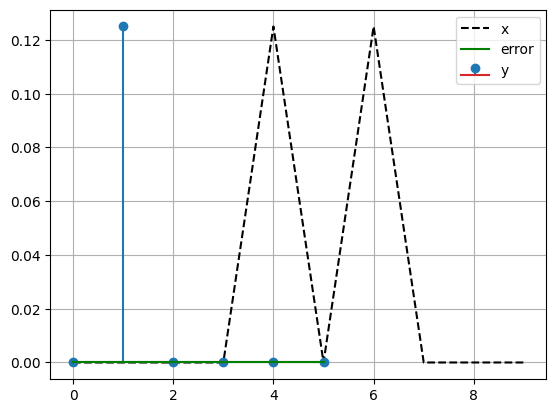

In [3]:
def make_data():
    EPS = 1e-50
    x = np.zeros(10)
    x[4] = x[6] = 0.125

    tmp = len(x)
    box_radius = int(1 + np.ceil(tmp / 2))
    center_x = int(len(x)/2)
    y = np.zeros(box_radius) + EPS

    y_expected = np.zeros(box_radius) + EPS
    y_expected[1] += 0.125
    
    return x, center_x, y, y_expected

x, center_x, y, y_expected = make_data()
plt.plot(x, 'k--',label='x')

with use_config(use_openmp=True):
    x, y = wrap(x, y)
    # compyle_1d_helper_inf_norm(x, y, center_x) #WORKS
    # compyle_1d_helper_inf_norm_explicit_annotate(x, y, center_x) #DOESN'T WORK
    compyle_1d_helper_2_norm(x, y, center_x) #WORKS
    # compyle_1d_helper_2_norm_explicit_annotate(x, y, center_x) #DOESN'T WORK
    y.pull()

y_actual = y.data/2

plt.stem(y_actual, label='y')
plt.plot(np.abs(y_expected - y_actual), 'g-', label='error')
plt.legend()
plt.grid()

In [5]:
print(compyle_1d_helper_2_norm.source)


# cython: language_level=3
from libc.stdio cimport printf
from libc.math cimport *
from libc.math cimport fabs as abs
from cython.parallel import parallel, prange

cimport openmp

cdef openmp.omp_lock_t cy_lock
openmp.omp_init_lock(&cy_lock)

cdef inline void compyle_1d_helper_2_norm(int i, double* x, double* y, int center_x) nogil:
    cdef double tmp
    cdef double frac_tmp
    cdef int j
    tmp = sqrt((i-center_x)**2)
    frac_tmp = tmp - floor(tmp)
    if frac_tmp < 0.5:
        j = <int> (floor(tmp))
    else:
        j = <int> (ceil(tmp))
    # j = cast(round(tmp), "int") #DOESN'T WORK
    y[j] += x[i]



### Energy Spectrum

In [7]:
def make_data_test(dim):
    es_ob = EnergySpectrum.from_example(dim=dim, nx=10, custom_formula=None)
    es_ob.compute(order=np.inf)
    ek_u = es_ob.ek_u
    ek_v = es_ob.ek_v
    ek_w = es_ob.ek_w
    dim = len(np.shape(ek_u))

    plt.plot(es_ob.ek, 'k--', label='expected')

    box_side_x = np.shape(ek_u)[0]
    box_side_y = np.shape(ek_u)[1] if dim > 1 else 0
    box_side_z = np.shape(ek_u)[2] if dim > 2 else 0

    tmp = np.array([box_side_x, box_side_y, box_side_z], dtype=np.float64)
    box_radius = int(1 + np.ceil(np.linalg.norm(tmp) / 2))

    center_x = int(box_side_x / 2)
    center_y = int(box_side_y / 2)
    center_z = int(box_side_z / 2)

    eps = 1e-50  # To avoid division by zero
    ek_u_sphere = np.zeros((box_radius, )) + eps
    ek_v_sphere = np.zeros((box_radius, )) + eps
    ek_w_sphere = np.zeros((box_radius, )) + eps

    return ek_u, ek_v, ek_w, box_side_x, box_side_y, box_side_z, center_x, center_y, center_z, ek_u_sphere, ek_v_sphere, ek_w_sphere

#### 1D

In [8]:
@elementwise
@annotate
def compyle_ek_1d_helper(i, ek_u, ek_u_sphere, center_x):
    wn = cast(abs(i - center_x), "int")
    ek_u_sphere[wn] += ek_u[i]

call_args = ['abs(i - center_x)', ' "int"']
wn = <int> (abs(i - center_x))


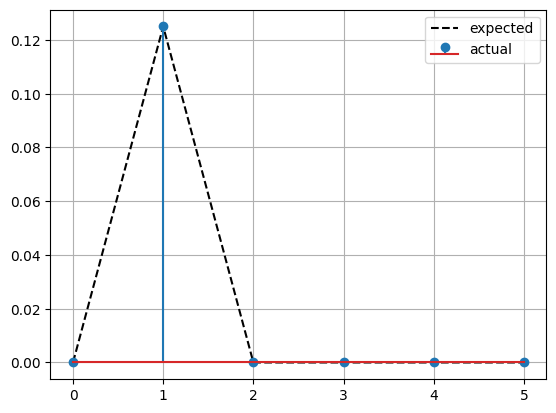

In [9]:
ek_u, ek_v, ek_w, box_side_x, box_side_y, box_side_z, center_x, center_y, center_z, ek_u_sphere, ek_v_sphere, ek_w_sphere =\
    make_data_test(dim=1)
with use_config(use_openmp=True):
    ek_u, ek_u_sphere = wrap(
        ek_u.ravel(), ek_u_sphere.ravel()
    )
    compyle_ek_1d_helper(ek_u, ek_u_sphere, center_x)
    ek_u_sphere.pull()
ek_actual = ek_u_sphere.data/2
plt.stem(ek_actual, label='actual')
plt.legend()
plt.grid()

#### 2D

In [10]:
def make_data_test(dim):
    es_ob = EnergySpectrum.from_example(dim=dim, nx=10, custom_formula=None)
    es_ob.compute(order=np.inf)
    ek_u = es_ob.ek_u
    ek_v = es_ob.ek_v
    ek_w = es_ob.ek_w
    dim = len(np.shape(ek_u))

    plt.plot(es_ob.ek, 'k--', label='expected')

    box_side_x = np.shape(ek_u)[0]
    box_side_y = np.shape(ek_u)[1] if dim > 1 else 0
    box_side_z = np.shape(ek_u)[2] if dim > 2 else 0

    tmp = np.array([box_side_x, box_side_y, box_side_z], dtype=np.float64)
    box_radius = int(1 + np.ceil(np.linalg.norm(tmp) / 2))

    center_x = int(box_side_x / 2)
    center_y = int(box_side_y / 2)
    center_z = int(box_side_z / 2)

    eps = 1e-50  # To avoid division by zero
    ek_u_sphere = np.zeros((box_radius, )) + eps
    ek_v_sphere = np.zeros((box_radius, )) + eps
    ek_w_sphere = np.zeros((box_radius, )) + eps

    return ek_u, ek_v, ek_w, box_side_x, box_side_y, box_side_z, center_x, center_y, center_z, ek_u_sphere, ek_v_sphere, ek_w_sphere

In [11]:
@elementwise
@annotate
def compyle_ek_2d_helper(
    i, ek_u, ek_v, ek_u_sphere, ek_v_sphere, box_side_y, center_x, center_y
):
    j = declare('int')
    # wn_max = declare('int')
    one_d_idx = declare('int')
    for j in range(box_side_y):
        wn_x = cast(abs(i - center_x), "int")
        wn_y = cast(abs(j - center_y), "int")
        # wn_max = max(wn_x, wn_y)
        # wn = cast(wn_max, "int")
        wn = cast(max(wn_x, wn_y), "int")
        one_d_idx = i*box_side_y + j
        ek_u_sphere[wn] += ek_u[one_d_idx]
        ek_v_sphere[wn] += ek_v[one_d_idx]

In [12]:
ek_u, ek_v, ek_w, box_side_x, box_side_y, box_side_z, center_x, center_y, center_z, ek_u_sphere, ek_v_sphere, ek_w_sphere =\
    make_data_test(dim=2)
with use_config(use_openmp=True):
    ek_u, ek_v, ek_u_sphere, ek_v_sphere = wrap(
        ek_u.ravel(), ek_v.ravel(), ek_u_sphere.ravel(), ek_v_sphere.ravel()
    )
    compyle_ek_2d_helper(ek_u, ek_v, ek_u_sphere, ek_v_sphere, box_side_y, center_x, center_y)
    ek_u_sphere.pull()
    ek_v_sphere.pull()
ek_actual = (ek_u_sphere.data + ek_v_sphere.data)/2
plt.stem(ek_actual, label='actual')
plt.legend()
plt.grid()

: 

: 

In [8]:
print(compyle_ek_2d_helper.source)


# cython: language_level=3
from libc.stdio cimport printf
from libc.math cimport *
from libc.math cimport fabs as abs
from cython.parallel import parallel, prange

cimport openmp

cdef openmp.omp_lock_t cy_lock
openmp.omp_init_lock(&cy_lock)

cdef inline void compyle_ek_2d_helper(int i, double* ek_u, double* ek_v, double* ek_u_sphere, double* ek_v_sphere, int box_side_y, int center_x, int center_y) nogil:
    cdef int wn_x
    cdef int wn_y
    cdef int wn
    cdef int j
    cdef int wn_max
    cdef int one_d_idx
    for j in range(box_side_y):
        wn_x = <int> (abs(i - center_x))
        wn_y = <int> (abs(j - center_y))
        wn_max = max(wn_x, wn_y)
        wn = <int> (wn_max)
        one_d_idx = i*box_side_y + j
        ek_u_sphere[wn] += ek_u[one_d_idx]
        ek_v_sphere[wn] += ek_v[one_d_idx]



In [1]:
def _handle_cast_statement(name, call):
    call_args = call[5:-1].split(',')
    #TODO: Doesn't not handle multiline function calls
    print(f"{call_args = }")
    if len(call_args) <= 2:
        expr = call_args[0].strip()
        ctype = call_args[-1].strip()[1:-1]
    else:
        expr = ','.join(call_args[0:-1]).strip()
        ctype = call_args[-1].strip()[1:-1]
    return '%s = <%s> (%s)' % (name, ctype, expr)

name = 'test'
call = 'cast(abs(x), "int")'
res = _handle_cast_statement(name, call)
print(res)
res == 'test = <int> (abs(x))'

call_args = ['abs(x)', ' "int"']
test = <int> (abs(x))


True

In [2]:
name = 'test'
call = 'cast(max(x, y), "int")'
res = _handle_cast_statement(name, call)
print(res)
res == 'test = <int> (max(x, y))'

call_args = ['max(x', ' y)', ' "int"']
test = <int> (max(x, y))


True

In [3]:
name = 'test'
call = 'cast(max(abs(i - center_x), abs(j - center_y)), "int")'
res = _handle_cast_statement(name, call)
print(res)

call_args = ['max(abs(i - center_x)', ' abs(j - center_y))', ' "int"']
test = <int> (max(abs(i - center_x), abs(j - center_y)))
